In [2]:
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [3]:
a = pd.read_json("data\AMD-19.json", orient = "columns", precise_float = True)["close"]
b = pd.read_json("data\Microsoft-19.json", orient = "columns", precise_float = True)["close"]
c = pd.read_json("data\Apple-19.json", orient = "columns", precise_float = True)["close"]
d = pd.read_json("data\ATT-19.json", orient = "columns", precise_float = True)["close"]
e = pd.read_json("data\Boeing-19.json", orient = "columns", precise_float = True)["close"]
f = pd.read_json("data\CVS-19.json", orient = "columns", precise_float = True)["close"]
g = pd.read_json("data\Delta-Airlines-19.json", orient = "columns", precise_float = True)["close"]
h = pd.read_json("data\Disney-19.json", orient = "columns", precise_float = True)["close"]
i = pd.read_json("data\Exxon-19.json", orient = "columns", precise_float = True)["close"]
j = pd.read_json("data\GM-19.json", orient = "columns", precise_float = True)["close"]
k = pd.read_json("data\GOOGL-19.json", orient = "columns", precise_float = True)["close"]
l = pd.read_json("data\JP-Morgan-19.json", orient = "columns", precise_float = True)["close"]
m = pd.read_json("data\Pfizer-19.json", orient = "columns", precise_float = True)["close"]
n = pd.read_json("data\Walmart-19.json", orient = "columns", precise_float = True)["close"]

df_pivot=pd.DataFrame({"AMD":a, "MSFT":b, "Apple":c, "ATT":d,"Boeing":e,"CVS":f,"Delta Air:":g,"Disney":h,"Exxon":i,"GM":j,"Google":k,"JP-Morgan":l,"Pfizer":m,"Walmart":n})

In [4]:
corr_df = df_pivot.corr(method='pearson')

In [5]:
corr_df.head()

,AMD,MSFT,Apple,ATT,Boeing,CVS,Delta Air:,Disney,Exxon,GM,Google,JP-Morgan,Pfizer,Walmart
AMD,1.000000,0.919796,0.839758,0.746620,-0.176544,-0.734700,0.851287,0.808046,0.312227,-0.018468,0.214954,0.729915,0.121850,0.825161
MSFT,0.919796,1.000000,0.844989,0.759110,-0.279363,-0.793300,0.842648,0.907193,0.259362,-0.083309,0.220771,0.806540,0.053916,0.888952
Apple,0.839758,0.844989,1.000000,0.550399,0.006094,-0.774111,0.896528,0.683172,0.646216,0.269587,0.601701,0.767969,-0.140450,0.655415
ATT,0.746620,0.759110,0.550399,1.000000,-0.318411,-0.566798,0.663110,0.660398,0.145950,-0.089277,0.011420,0.518063,0.357850,0.800692
Boeing,-0.176544,-0.279363,0.006094,-0.318411,1.000000,0.144078,-0.151480,-0.374233,0.509729,0.716830,0.281639,-0.159613,0.012464,-0.213856


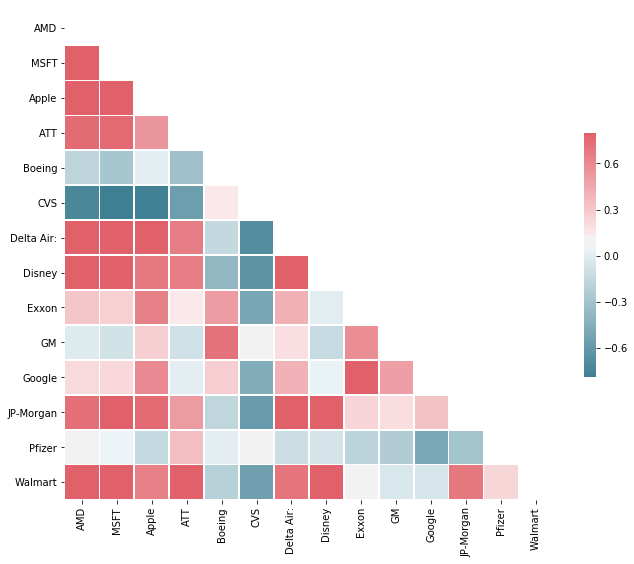

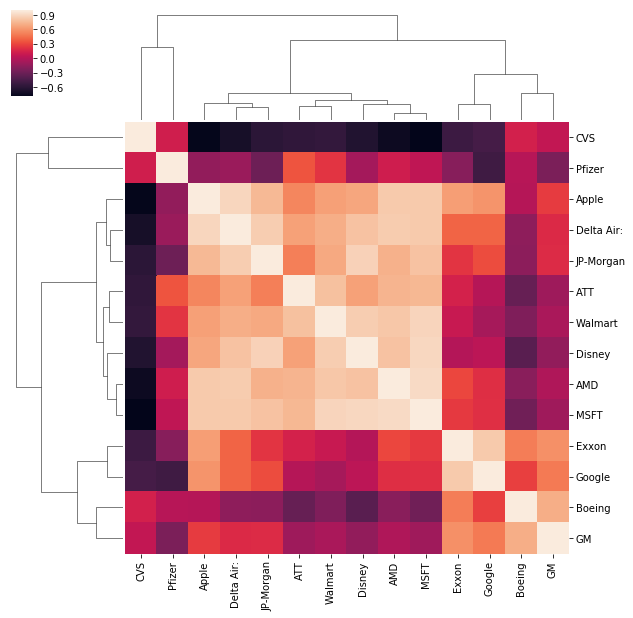

In [17]:
# Compute the correlation matrix
corr =corr_df

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0.1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)

In [7]:
a = pd.read_json("data\AMD-19.json", orient = "columns", precise_float = True)
a.head()

,APO,Aroon Down,Real Middle Band,MIDPOINT,OBV,SINE,QUADRATURE,open,close
2019-01-02,-1.3678,93.3333,21.8489,22.8749,2972869172,0.2234,0.1396,18.01,18.83
2019-01-03,-1.4920,91.6667,21.6857,22.8749,2855591609,0.3039,1.7179,18.42,17.05
2019-01-04,-1.5285,90.0000,21.5446,22.8749,2967470191,0.3884,2.3650,17.55,19.00
2019-01-07,-1.4288,88.3333,21.4274,22.8749,3074627205,0.5036,2.3400,19.44,20.57
2019-01-08,-1.2794,86.6667,21.3241,22.8749,3195898191,0.6317,1.8010,21.19,20.75


In [9]:
corr_df_features = a.corr(method='pearson')

In [10]:
corr_df_features.head()

,APO,Aroon Down,Real Middle Band,MIDPOINT,OBV,SINE,QUADRATURE,open,close
APO,1.000000,-0.382882,0.035994,0.079741,0.382928,-0.390466,-0.243246,0.332128,0.302846
Aroon Down,-0.382882,1.000000,-0.492361,-0.371533,-0.574074,0.143829,0.107757,-0.671587,-0.660463
Real Middle Band,0.035994,-0.492361,1.000000,0.968747,0.623985,-0.058939,-0.002527,0.885049,0.885545
MIDPOINT,0.079741,-0.371533,0.968747,1.000000,0.578712,-0.056268,0.015093,0.852068,0.848870
OBV,0.382928,-0.574074,0.623985,0.578712,1.000000,-0.142169,0.043047,0.804024,0.834600


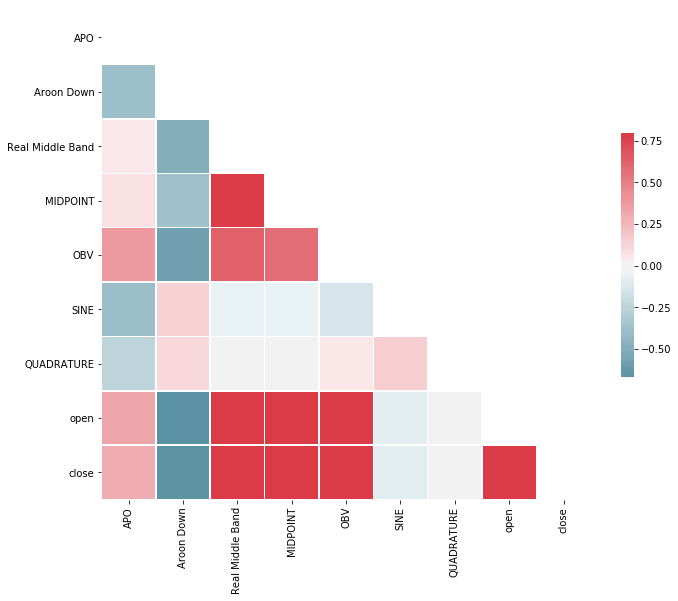

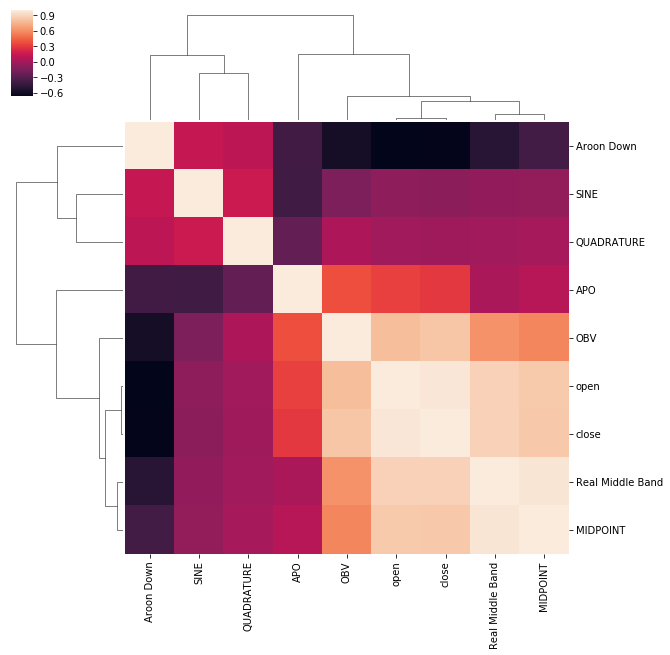

In [18]:
# Compute the correlation matrix
corr =corr_df_features

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)

In [21]:
b = pd.read_json("data\Microsoft-19.json", orient = "columns", precise_float = True)
b.head()

,Aroon Down,Real Middle Band,MIDPOINT,OBV,SINE,QUADRATURE,open,close
2019-01-02,93.3333,108.2529,105.695,-1226584871,0.0217,-1.6115,99.55,101.12
2019-01-03,91.6667,108.0365,105.695,-1269163281,0.1154,4.5665,100.10,97.40
2019-01-04,90.0000,107.8778,105.695,-1225102661,0.1890,7.4878,99.72,101.93
2019-01-07,88.3333,107.7143,105.695,-1189446525,0.2911,5.3750,101.64,102.06
2019-01-08,86.6667,107.5888,105.695,-1157932110,0.3721,2.2584,103.04,102.80


In [22]:
corr_df_features = b.corr(method='pearson')

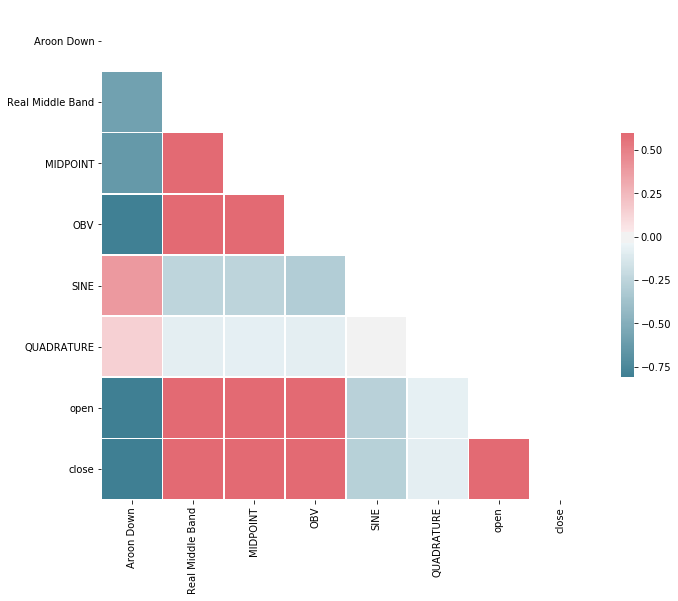

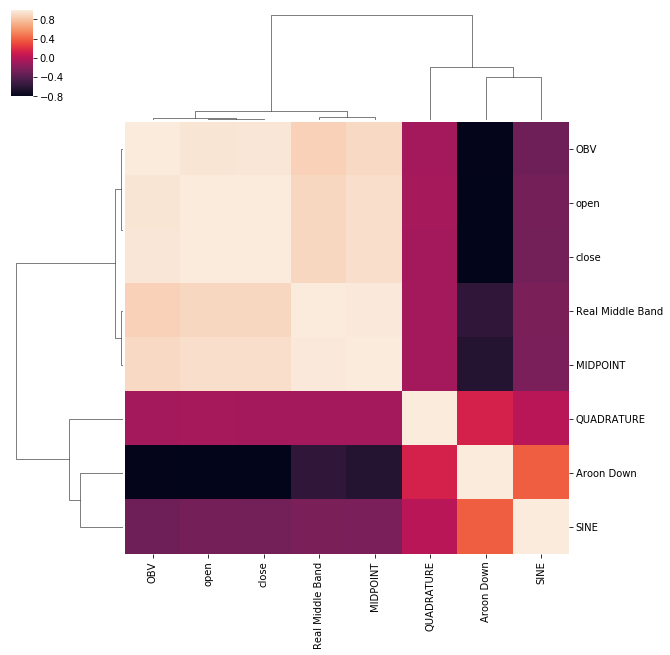

In [24]:
# Compute the correlation matrix
corr =corr_df_features

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)

In [26]:
f = pd.read_json("data\CVS-19.json", orient = "columns", precise_float = True)
corr_df_features = f.corr(method='pearson')

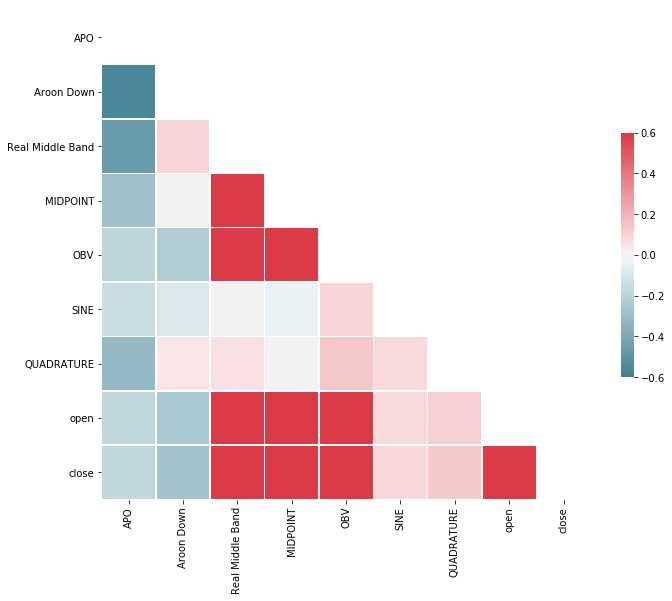

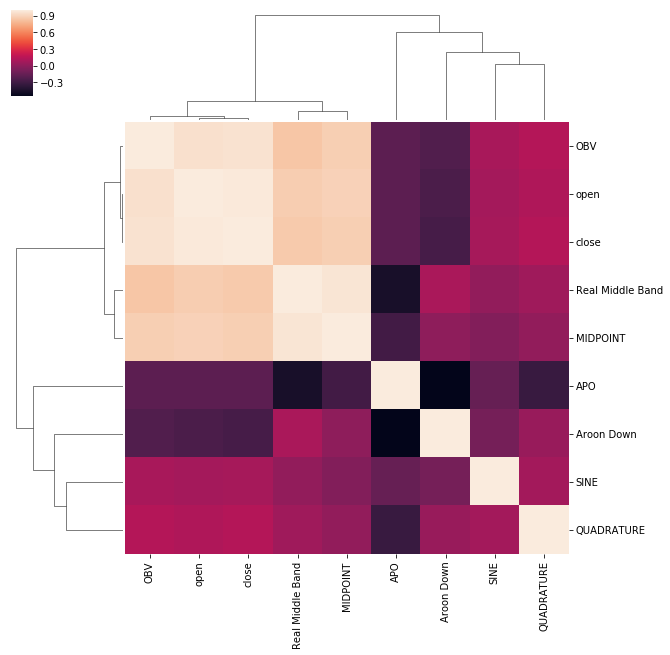

In [32]:
# Compute the correlation matrix
corr =corr_df_features

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6,vmin=-0.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)